In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
Pfizer_file = pd.read_csv('Pfizer.csv')
Pfizer_data = [float(x) for x in Pfizer_file['Open']]
Pfizer_time = pd.to_datetime(Pfizer_file['Date'])

Moderna_file = pd.read_csv('Moderna.csv')
Moderna_data = [float(x) for x in Moderna_file['Open']]
Moderna_time = pd.to_datetime(Moderna_file['Date'])

## Wykresy 

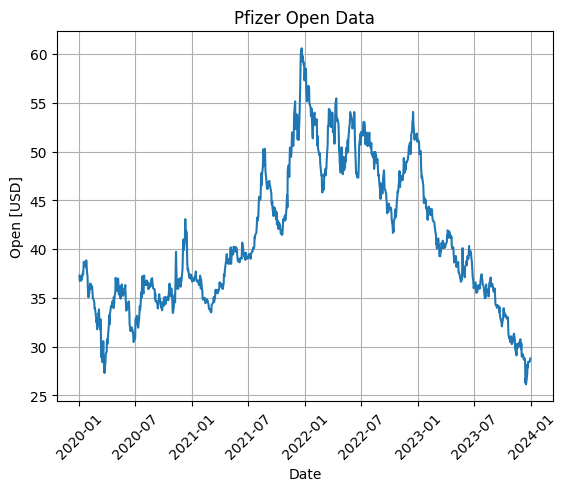

In [5]:
plt.plot(Pfizer_time, Pfizer_data)
plt.xlabel('Date')
plt.ylabel('Open [USD]')
plt.xticks(rotation=45)
plt.title('Pfizer Open Data')
plt.grid(True)
plt.savefig("data_pfizer.png")
plt.show()

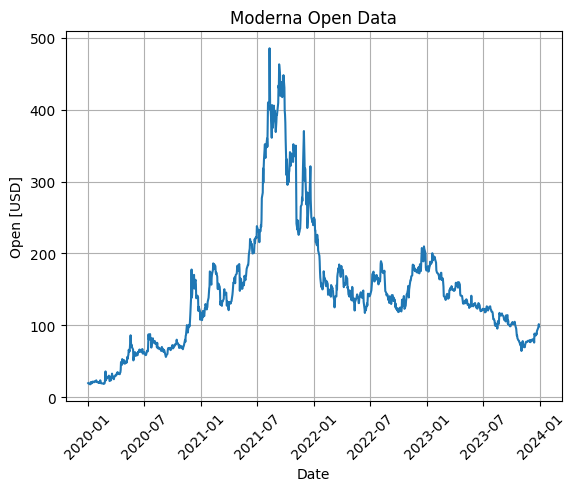

In [6]:
plt.plot(Moderna_time, Moderna_data)
plt.xlabel('Date')
plt.ylabel('Open [USD]')
plt.title('Moderna Open Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("data_moderna.png")
plt.show()

## Średnia

In [7]:
def arytmetyczna(data):
    return sum(data)/len(data)

def harmoniczna(data):

    suma = 0
    for i in range(len(data)):
        suma += 1/data[i]

    return len(data)/suma

def geometryczna(data):
    product = 1
    for i in range(len(data)):
        product *= data[i]

    return product**(1/len(data))

In [8]:
print("Srednia arytmetyczna Pfizer", arytmetyczna(Pfizer_data))
print("Srednia arytmetyczna Moderna", arytmetyczna(Moderna_data))

Srednia arytmetyczna Pfizer 40.96097044632205
Srednia arytmetyczna Moderna 147.19275533300208


In [9]:
print("Srednia harmoniczna Pfizer", harmoniczna(Pfizer_data))
print("Srednia harmoniczna Moderna", harmoniczna(Moderna_data))

Srednia harmoniczna Pfizer 39.69745171877357
Srednia harmoniczna Moderna 94.8250220800443


### Współczynnik korelacji

In [10]:
corr_coefficient = np.corrcoef(Pfizer_data, Moderna_data)[0, 1]

print("Współczynnik korelacji:", corr_coefficient)

Współczynnik korelacji: 0.5597391771349524


In [13]:
Pfizer_data = np.array(Pfizer_data)
Moderna_data = np.array(Moderna_data)
n = len(Moderna_data)

sum_multip = np.sum(Moderna_data * Pfizer_data)
sum_Moderna = np.sum(Moderna_data)
sum_Pfizer = np.sum(Pfizer_data)
sum_Moderna2 = np.sum(Moderna_data**2)
sum_Pfizer2 = np.sum(Pfizer_data**2)

corr_coefficient = (n * sum_multip - sum_Moderna * sum_Pfizer) / np.sqrt((n * sum_Moderna2 - sum_Moderna**2) * (n * sum_Pfizer2 - sum_Pfizer**2))

print("Współczynnik korelacji:", corr_coefficient)

Współczynnik korelacji: 0.5597391771349518


### wykresik punktowy

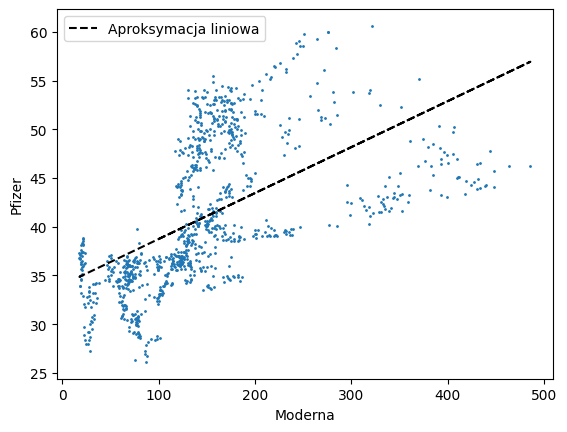

In [29]:
a, b = np.polyfit(Moderna_data, Pfizer_data, 1)

plt.scatter(Moderna_data, Pfizer_data, s=1)
plt.plot(Moderna_data, a * Moderna_data + b, color='black', linestyle='--', label='Aproksymacja liniowa')

plt.xlabel("Moderna")
plt.ylabel("Pfizer")
plt.legend() 
plt.show()

### Boxploty

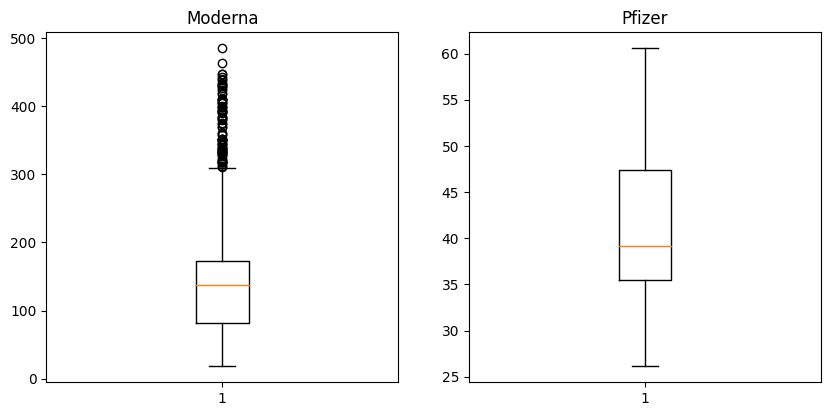

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.boxplot(Moderna_data)
plt.title("Moderna")

plt.subplot(2, 2, 2)
plt.boxplot(Pfizer_data)
plt.title("Pfizer")

plt.show()